In [ ]:
# Load in all of the imports that are needed throughout the code. When using matplotlib, you set the plt parameters
# with the code at the bottom. 

In [2]:
# IMPORTS
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plt parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
# Load all of the "Action" files into "screenplays"  as text files. Then append these files.

In [3]:
# To see a list of all the files
# for p in Path('Documents/engl370/imsdb_raw_nov_2015/Action/').glob('**/*.txt'):
#     print(f"{p.name}\n")

# by subdirectory
screenplays = []
for p in Path('movies/Action/').glob('*.txt'):
    with open(p, mode="r", encoding="utf8", errors='ignore') as f:
        contents = f.read()
        screenplays.append(contents)

In [ ]:
# Print the amount of movie scripts that there is total.

In [4]:
len(screenplays)

290

In [ ]:
# Now use the CountVectorizer to lowercase the text, set the minimum document frequency, and the maximum document
# frequency. Now "matrix" means that I'm just fitting the model to the data (screenplays). Also set the 
# vocabulary now and I will use it later. Now print the features. This shows the total amount of screenplays and
# the total amount of words with a min_df of 2 and a max_df of 0.9.

In [5]:
# Vectorize our texts while removing function words
# and words that occur in only one text
vectorizer = CountVectorizer(lowercase = True,
                             min_df = 2,
                             max_df = 0.9)

# fit the model to the data 
matrix = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# see how many features we have
matrix.shape

(290, 38708)

In [ ]:
# Now using the data that I have so far, convert that data into a document term matrix. The document term matrix
# has words as columns and documents as rows. 

In [5]:
# Convert to a dataframe
df = pd.DataFrame(matrix.toarray(), 
                  columns = vectorizer.get_feature_names_out())

df.head()

,00,000,003,004,007,009,00am,00pm,01,02,...,zoos,zorro,zulu,zurich,zus,zwei,zwick,zy,zzz,zzzzzz
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# This is where I will use kmeans, which creates a graph. The %%time cell magic allows us to see how long a cell takes
# to run. Please note that it must come before anything else in the cell, even comments!

In [22]:
%%time

# We are going to run this up to 50 possible clusters
wcss = [] 
for i in range(10, 40): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(matrix) 
    wcss.append(kmeans.inertia_)

CPU times: user 29 s, sys: 18.1 s, total: 47 s
Wall time: 9.75 s


In [ ]:
# This code will actually plot the graph and will run up through 50 possible characters. Set the x (horizontal axis)
# to 'Number of clusters' and the y (vertical axis) to 'WCSS'.

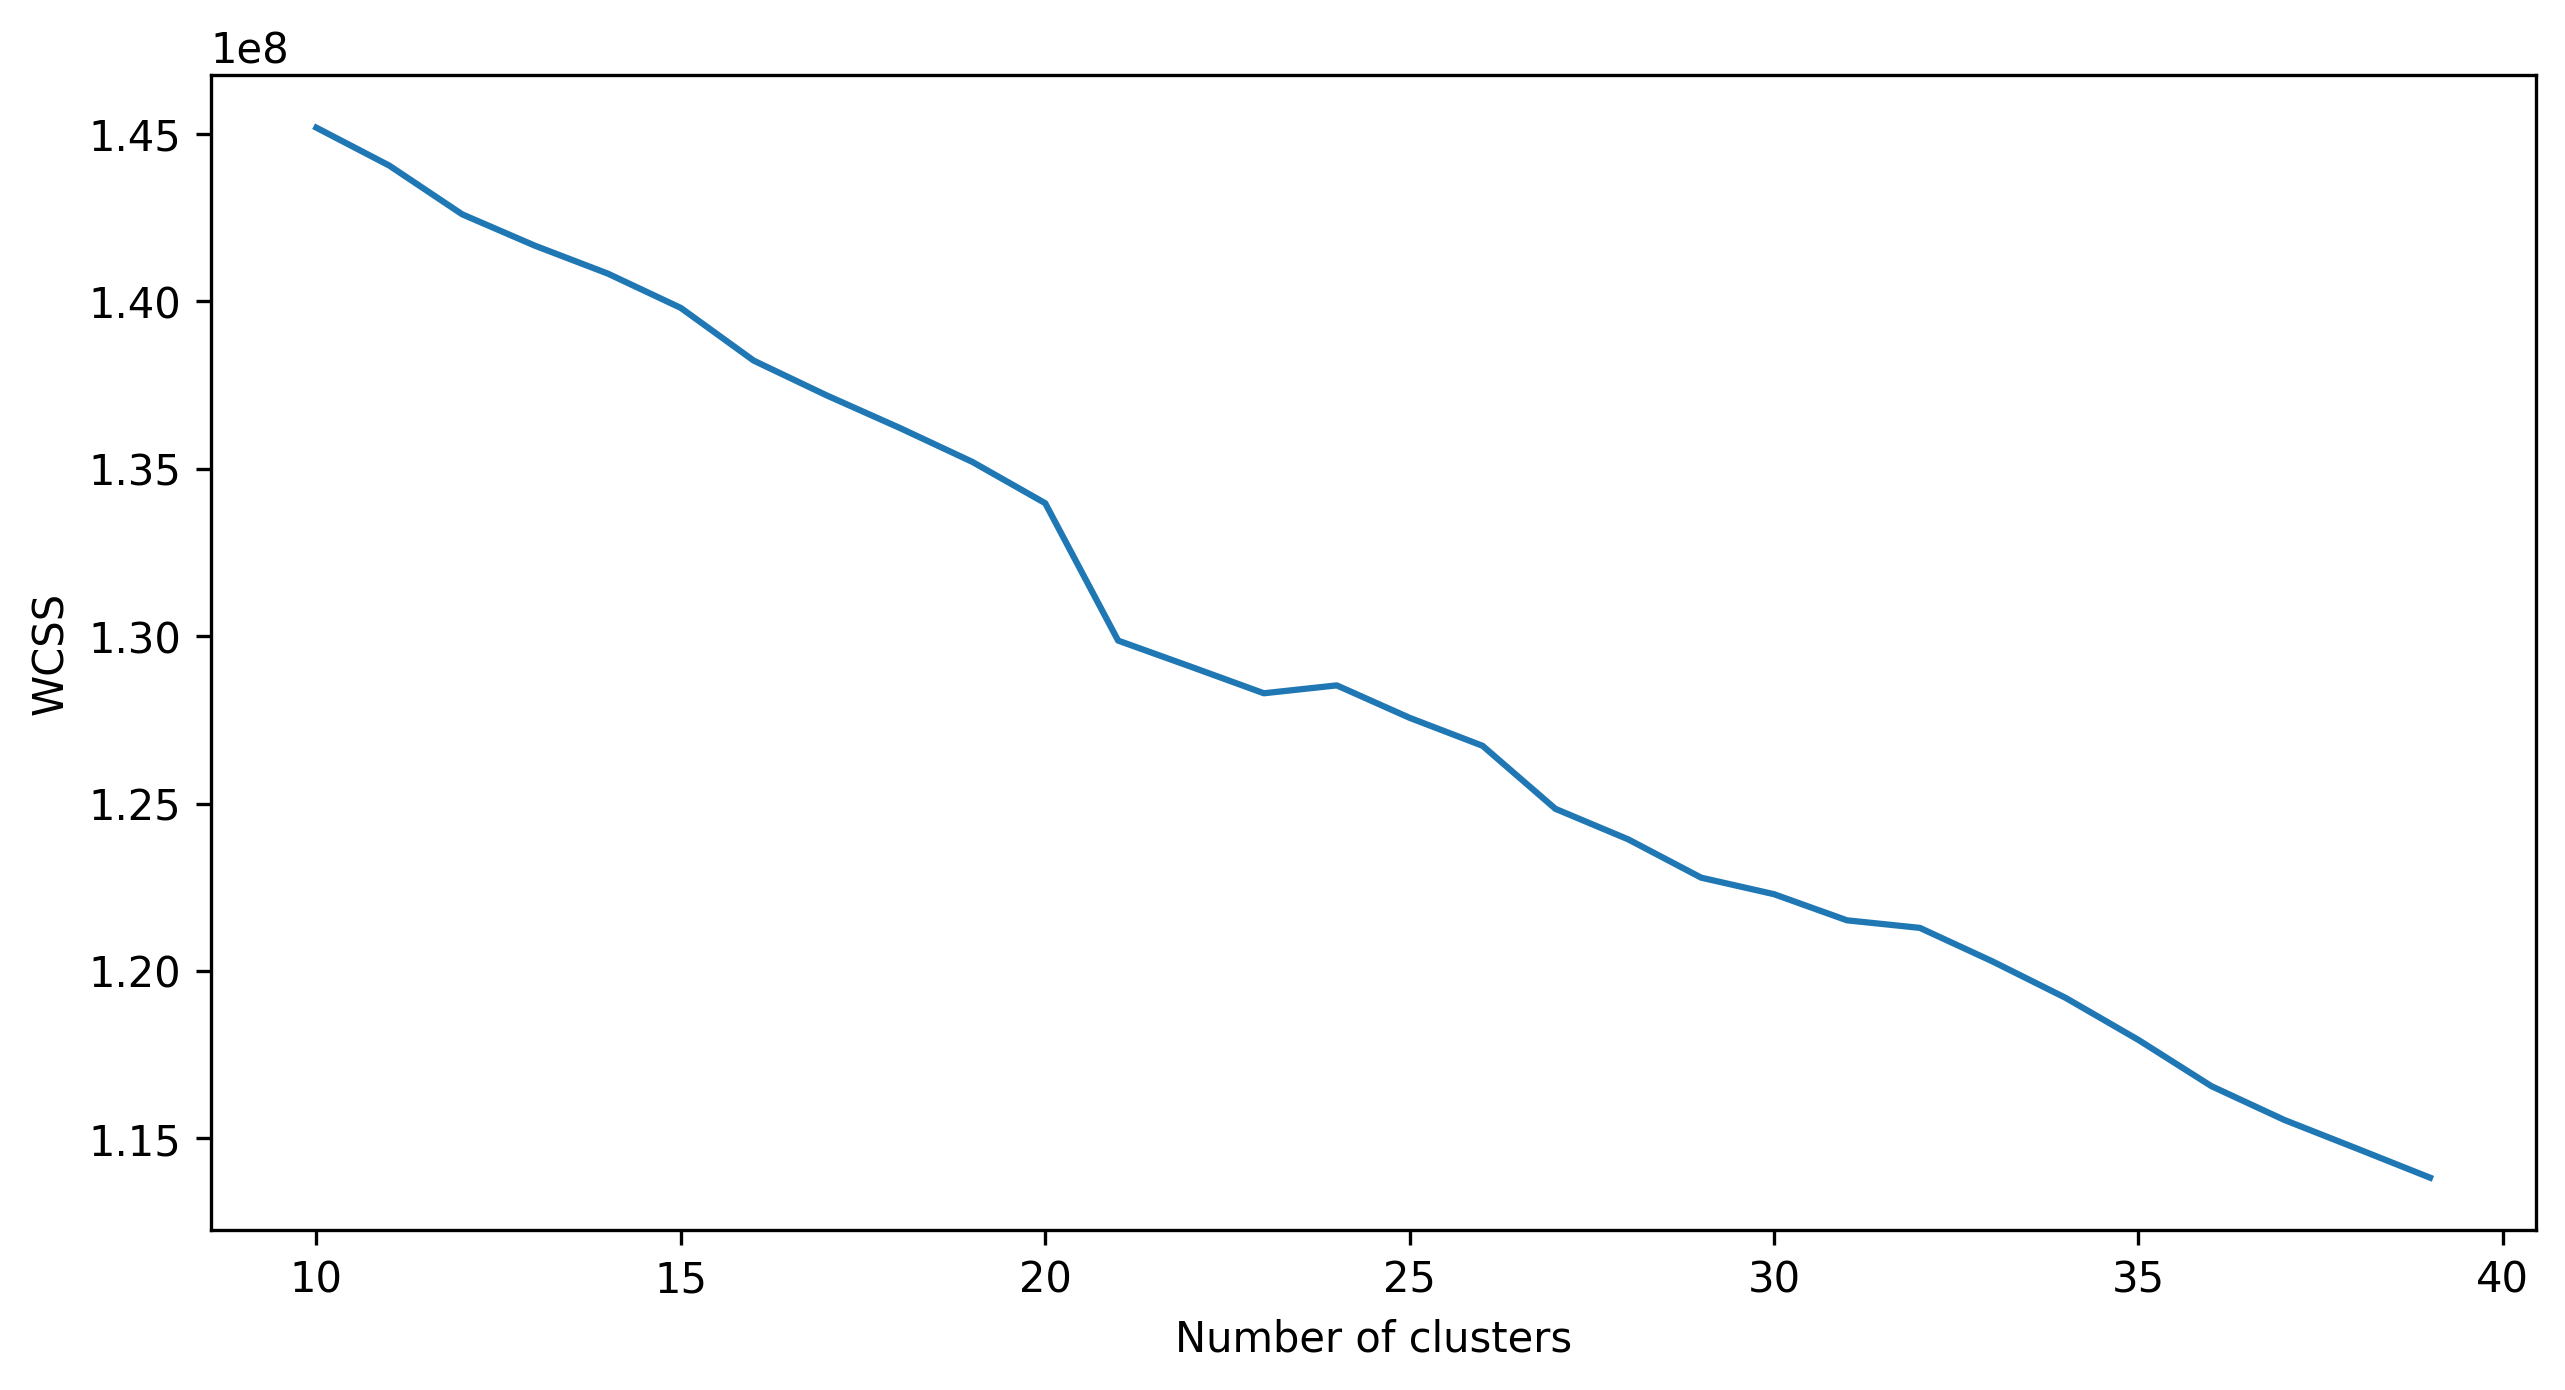

In [23]:
# Let's plot and we'll run this up through 50 possible clusters
plt.plot(range(10, 40), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()